# ***Done By K.A.H***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [2]:
from google.colab import files
uploaded = files.upload()


ModuleNotFoundError: No module named 'google'

In [6]:
df = pd.read_csv(io.BytesIO(uploaded["performance.csv"]))
df.head()

,Province,City,Area,Company,Status,Delivery Time,Delivery Charges
0,Sindh,Hyderababd,Main,BLUEX,Delivered,13 Days,150
1,Punjab,Jampur,Main,BLUEX,Delivered,10 Days,150
2,Sindh,KARACHI,Main,BLUEX,Delivered,6 Days,150
3,Punjab,Wah Cantt,Tehsil,BLUEX,Delivered,9 Days,150
4,Sindh,Karachi,Main,BLUEX,Delivered,6 Days,150


In [8]:
df['Company'].unique()

array(['BLUEX', 'TRAX'], dtype=object)

In [29]:
group_by_company = df.groupby('Company')
group_by_company.sum()

,Delivery Charges
Company,
BLUEX,14430
TRAX,11770


In [33]:
# Now For delivery Time We have to do:
import re
Delivery_time = df['Delivery Time']
li = list()

for i in range(Delivery_time.size):
  res = re.search(r"\d*", Delivery_time[i])
  li.append(int( res.group()))

In [38]:
df['Delivery Time'] =  li
df['Delivery Time']

0      13
1      10
2       6
3       9
4       6
       ..
175     9
176     8
177     8
178    10
179     9
Name: Delivery Time, Length: 180, dtype: int64

**Q1: Which Company is best in Quick delivery**

In [42]:

  group_by_area = df.groupby(['Company', 'Area'])
  group_by_area.sum()

Delivery Time  Delivery Charges
Company Area                                    
BLUEX   Main               553             12300
        Tehsil              58              1020
        Village             69              1110
TRAX    Main               405             10720
        Tehsil              25               750
        Village             12               300

In [67]:
BLUEX = group_by_company.get_group('BLUEX')
BLUEX.head()

,Province,City,Area,Status,Delivery Time,Delivery Charges,Days,_
0,Sindh,Hyderababd,Main,Delivered,13,150,13,Days
1,Punjab,Jampur,Main,Delivered,10,150,10,Days
2,Sindh,KARACHI,Main,Delivered,6,150,6,Days
3,Punjab,Wah Cantt,Tehsil,Delivered,9,150,9,Days
4,Sindh,Karachi,Main,Delivered,6,150,6,Days


In [70]:
TRAX = group_by_company.get_group('TRAX')
TRAX.head()

,Province,City,Area,Status,Delivery Time,Delivery Charges,Days,_
65,Capital,Islamabad,Main,Delivered,5,150,5,Days
66,Punjab,Arifwala,Tehsil,Delivered,7,150,7,Days
67,Capital,Islamabad,Main,Delivered,3,150,3,Days
68,NaN,Ahmed Pur East,Main,Delivered,5,150,5,Days
69,Sindh,Karachi,Main,Delivered,2,150,2,Days


			 BLUEX Company:


,Delivery Time,Delivery Charges
sum,680.000000,14430.000000
min,1.000000,150.000000
max,16.000000,180.000000
mean,7.472527,158.571429


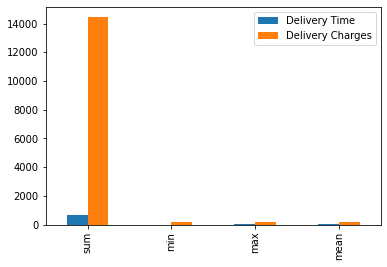

In [74]:
BLUEX_plot = BLUEX[['Delivery Time', 'Delivery Charges']].agg([sum, min, max, np.mean])
print("\t\t\t BLUEX Company:")
display(BLUEX_plot)
print('\n\n')
BLUEX_plot.plot(kind = 'bar')

,Delivery Time,Delivery Charges
sum,442.000000,11770.000000
min,1.000000,0.000000
max,14.000000,150.000000
mean,4.966292,132.247191


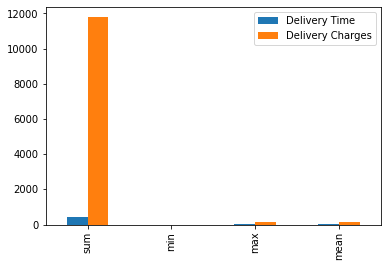

In [72]:
TRAX_plot = TRAX[['Delivery Time', 'Delivery Charges']].agg([sum, min, max, np.mean])
display(TRAX_plot)
print('\n\n')
TRAX_plot.plot(kind = 'bar')

In [ ]:
# So From Above, Trax is best in Quick deliveries

**Q2: Which Company is best in Main, Tehsil, and Villages ?**

In [44]:
area_plot = group_by_area.mean()
area_plot

Delivery Time  Delivery Charges
Company Area                                    
BLUEX   Main          7.089744        157.692308
        Tehsil        9.666667        170.000000
        Village       9.857143        158.571429
TRAX    Main          4.939024        130.731707
        Tehsil        5.000000        150.000000
        Village       6.000000        150.000000

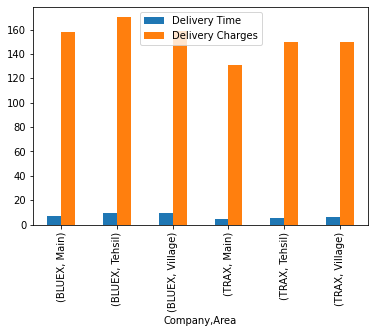

In [46]:
area_plot.plot(kind = 'bar')
#After Viewing this TRUEX is best in Quick Delivery 

In [75]:
# According to Above, Trax has better performance and Less in delivery Charges than Bluex in all Main, tehsil, Villages

**Q3: Which Companies offers more cities(MAIN, Tehsil, Villages) ?**

Area,Main,Tehsil,Village
Company,,,
BLUEX,78,6,7
TRAX,82,5,2


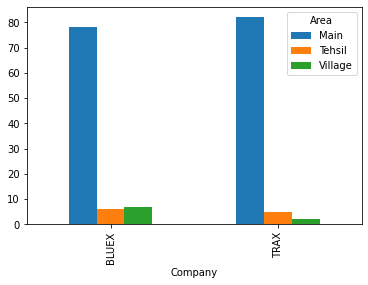

In [65]:

df2 =  group_by_area.size()

            # unstack():
#Pivot a level of the (necessarily hierarchical) index labels, 
#returning a DataFrame having a new level of column labels whose 
#inner-most level consists of the pivoted index labels

display(df2.unstack()) 
print("\n\n")

df2 = df2.unstack()
df2.plot(kind = 'bar')

# In MAin: TRAX is GOOD
# In Tehsil Trax is good
# In 

In [76]:
# So From Above, TRAX offer more cities in MAIn and BLUES offers more cities in Tehsil and Villages

**Q4: Which Company is more Expensive ?**

In [96]:
BLUEX_rate = BLUEX[['Delivery Time', 'Delivery Charges']].agg([np.mean])
display(BLUEX_rate)
print("\n\n")
TRAX_rate = TRAX[['Delivery Time', 'Delivery Charges']].agg([np.mean])
TRAX_rate

,Delivery Time,Delivery Charges
mean,7.472527,158.571429


,Delivery Time,Delivery Charges
mean,4.966292,132.247191



		BLUEX:
 AxesSubplot(0.125,0.125;0.775x0.755)


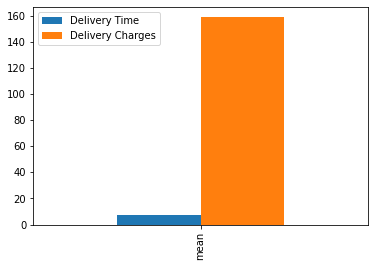

In [107]:
print("\n\t\tBLUEX:\n",BLUEX_rate.plot(kind = 'bar'), '\n')



		TRAX:
 AxesSubplot(0.125,0.125;0.775x0.755)


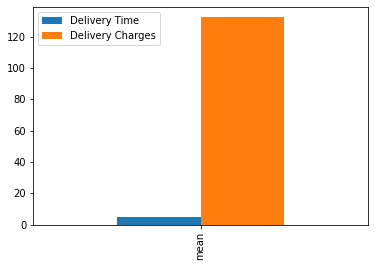

In [109]:
print('\n\t\tTRAX:\n',TRAX_rate.plot(kind = 'bar'))

In [110]:
# So From Above BLUEX is more expensive than TRAX 

**Q5: In Which Scenario which company should be preferred?**

In [112]:
df3 = df.groupby(['Company', 'Status']).size()
df3

Company  Status           
BLUEX    Delivered            65
         Returned Recieved    26
TRAX     Delivered            75
         Returned Recieved    14
dtype: int64

In [113]:
df3 = df3.unstack()
df3

Status,Delivered,Returned Recieved
Company,,
BLUEX,65,26
TRAX,75,14


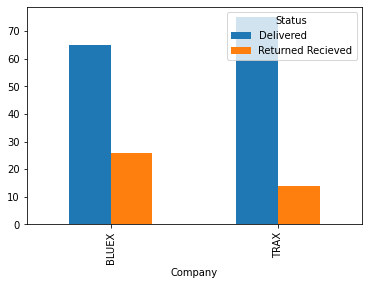

In [114]:
df3.plot(kind = 'bar')

In [115]:
# So From above, In quick delivery and less expensive TRAX should be preferred
# And According to Bluex has more coverage in Tehsil and Village.
# So If someone belonging to tehsil and village, BLUEX should be preferred

**Q6: Which Company is good According To each Province ?**

In [117]:
df3=df.groupby(['Company','Province']).size()
df3

Company  Province   
BLUEX    AJK             1
         Balochistan     4
         Capital         1
         KPK             6
         Punjab         38
         Sindh          27
TRAX     AJK             3
         Balochistan     2
         Capital         7
         KPK             5
         Punjab         41
         Sindh          19
dtype: int64

In [118]:
df3=df3.unstack()
df3


Province,AJK,Balochistan,Capital,KPK,Punjab,Sindh
Company,,,,,,
BLUEX,1,4,1,6,38,27
TRAX,3,2,7,5,41,19


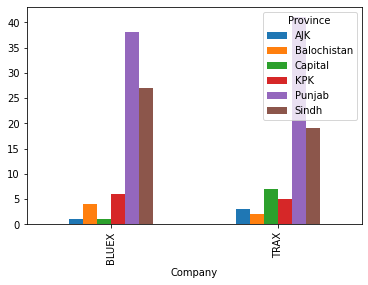

In [119]:
df3.plot(kind='bar')

In [120]:
# Trax offer more order in Punjab, AJK, and Capital
# BLUEX offers more in Sindh, KPK,and Balochistan